# BT2101 K-Means and Hierarchical Clustering

## 1 Goal

In this notebook, we will explore clustering method, an unsupervised learning method, including:
* K-Means Clustering
* Hierarchical Clustering

In [1]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division
from math import sqrt
%matplotlib inline

### 1.1 K-Means Clusting

K-Means Clustering steps:

1. Determine the number of k (i.e., number of clusters)
2. Randomly select k centroids (i.e. centers of clusters)
3. Assign each data point to its closest centroid
4. Recalculate the centroids as the average of all data points in a cluster
5. Assign data points to their closest centroids
6. Repeat Step 4 and 5 until the observations are not reassigned or the maximum number of iterations is reached

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [2]:
# Load libraries and dataset
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data
filepath = './iris.csv'
colnames = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
feature_list =  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
#iris = pd.read_csv(filepath, header=None, names=colnames, dtype={'sepal_length':np.float64, 'sepal_width':np.float64, 'petal_length':np.float64, 'petal_width':np.float64})
iris = pd.read_csv(filepath)
features = iris[feature_list]

# Standardize features: Z-index
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

In [3]:
# Fit k-means clustering model: Suppose 3 clusters
cluster_3 = KMeans(n_clusters=3, random_state=0, n_jobs=-1)
model_3 = cluster_3.fit(features) # Clustering without feature standardization
model_std_3 = cluster_3.fit(features_std) # Clustering after feature standardization

In [4]:
# View cluster centers for each cluster:
model_std_3.cluster_centers_

array([[ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

In [5]:
# View predicted clusters:
model_std_3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [6]:
# Compare with true classes:
# Remember usually you have no output labels in the dataset used for clustering
iris['species'].values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [7]:
# Predict which cluster is a new observation in:
new_obs = [[0.5, 0.5, 0.5, 0.5]]
model_std_3.predict(new_obs)

array([0])

### How to choose k? 
#### Elbow method
* Gauge how the heterogeneity within clusters changes for various of k.
* The heterogeneity within clusters is expected to decreases with more clusters.
* The heterogeneity is measured by within-clusters/groups sum of squares (WSS)

\begin{align}
WSS(k) = \mathop{\sum}_{i=1}^{N}\mathop{\sum}_{j=0}^{p}(x_{ij}-centroid(x_{kj}))^2
\end{align}

Suppose N observations and p features. <br/>
k is cluster id ($=1,...,K$). <br/>
$x_{ij}$ is $i^{th}$ observation $j^{th}$ feature. <br/>
$centroid(x_{kj})$ is $k^{th}$ centroid of feature $j$.

In [8]:
# Import scipy used for calculate distances
from scipy.spatial.distance import cdist

References: https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

In [9]:
# Cluster data with 1-10 clusters and get centroids

N_cluster = range(1, 11) # Assume number of 1 to 10 clusters
WSS_list = [] # A list of WSS for 1 to 10 clusters

for k in N_cluster:
    
    # Run k-means model
    cluster = KMeans(n_clusters=k, random_state=0, n_jobs=-1) # Run the model with k clusters: k from 1 to 10
    model = cluster.fit(features_std) # Fit the data with standardized features
    centroids = model.cluster_centers_ # Get centroids for each cluster id (=0,...,k-1)
    labels = model.labels_ # Get labels (which cluster id) for each observation
    
    # Calculate WSS(k)
    squared_distance = cdist(features_std, centroids, 'sqeuclidean') # Calculate squared distance between each observation and k centroids
    #min_distance_cluster_id = np.argmin(squared_distance, axis=1) # Find the index of minimum squared distance for each observation
    min_distance = np.min(squared_distance, axis=1) # Find minimum squared distance for each observation
    WSS = np.sum(min_distance)
    
    WSS_list.append(WSS)   
    

In [10]:
# Show WSS for 1-10 clusters
WSS_list

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.42970777082233,
 91.148601194595557,
 80.230607045069576,
 70.939643727568125,
 62.967584883250332,
 55.706410530757729,
 47.473984155504269]

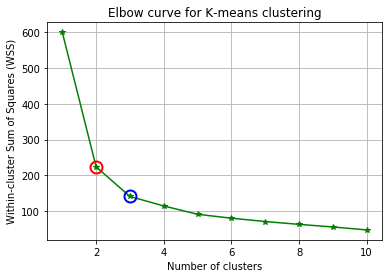

In [11]:
# Plot the elbow curve
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(N_cluster, WSS_list, 'g*-')
ax.plot(N_cluster[1], WSS_list[1], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.plot(N_cluster[2], WSS_list[2], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='b', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow curve for K-means clustering')

plt.show()

#### If you choose k=3, you can use pairplot to visualize the differences of these 3 clusters in terms of their attributes

References: https://seaborn.pydata.org/generated/seaborn.pairplot.html

C:\Users\mozartkun\Anaconda2\envs\python3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\mozartkun\Anaconda2\envs\python3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


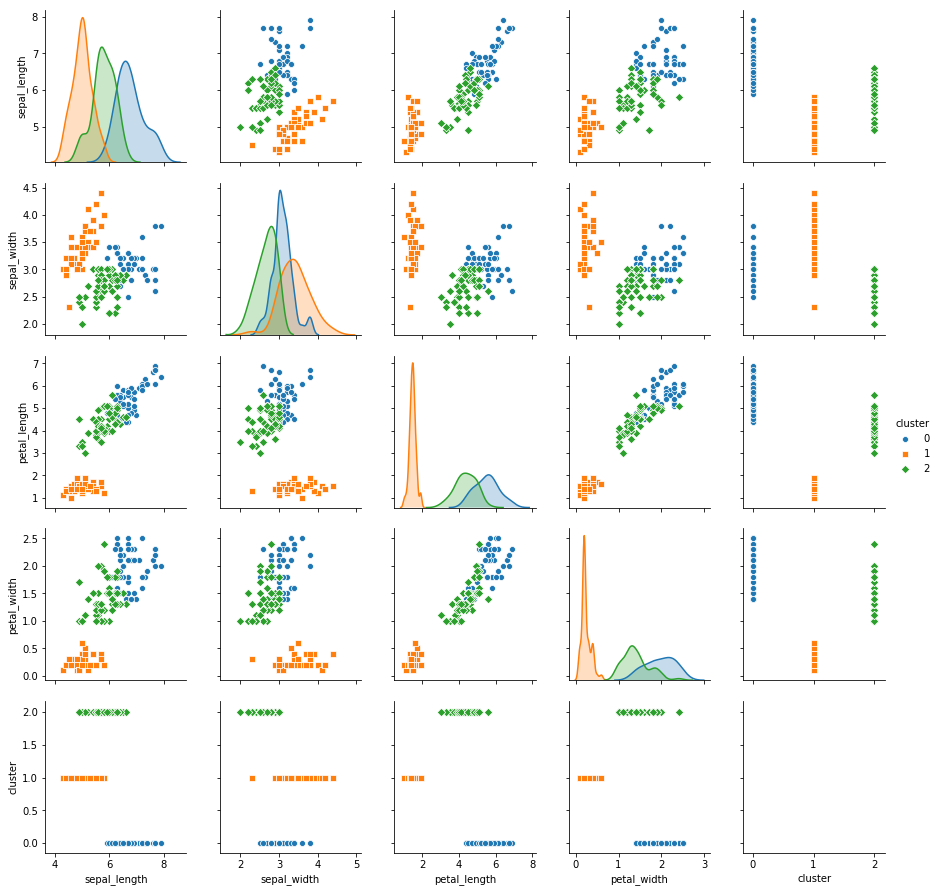

In [12]:
import seaborn as sns
from copy import deepcopy

# Run k-means model
cluster = KMeans(n_clusters=3, random_state=0, n_jobs=-1)
y_pred = cluster.fit_predict(features_std) 

data = deepcopy(iris[feature_list])
data['cluster'] = y_pred
sns.pairplot( data, hue='cluster', diag_kind='kde', markers=['o','s','D'])

The original codes can be found at http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html.

### 1.2 Hierarchical Clustering

Hierarchical Clustering Steps:

1. Start with n clusters (each record is its own cluster)
2. Merge two closest records into one cluster
3. At each successive step, the two clusters closest to each other are merged 

In [13]:
# Load Libraries
from sklearn.cluster import AgglomerativeClustering

In [14]:
# Create meanshift object
HC = AgglomerativeClustering(n_clusters=3)
HC_model = HC.fit(features_std)

In [15]:
# Show clusters
HC_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

<function dict.items>

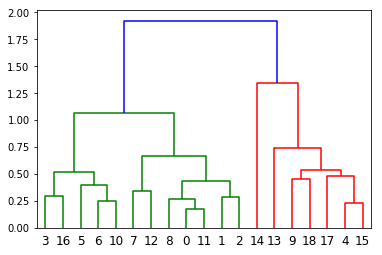

In [16]:
# Plot dendrogram for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
avg_link = linkage(features_std[1:20, :], method='average') # Linkage criterion: average distance
dendrogram(avg_link).items

References: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

More information about hierarchical clustering can be found at: <br/>
[1] http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html <br/>
[2] https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

## 2 Assignments on K-Means Clustering (5 points)

**The purpose of this assignment is to know how to use scikit-learn package to do K-Means clustering**

#### Overview

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.The dataset can be downloaded here (https://www.kaggle.com/arjunbhasin2013/ccdata/home). It is released under [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/).

In [17]:
# Load libraries and dataset
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

# Load data
feature_list = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
creditcard = pd.read_csv('./CC GENERAL.csv')[['CUST_ID']+feature_list]
creditcard.head(n=5)

,CUST_ID,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,C10001,40.900749,95.40,0.000000,1000.0,201.802084,139.509787
1,C10002,3202.467416,0.00,6442.945483,7000.0,4103.032597,1072.340217
2,C10003,2495.148862,773.17,0.000000,7500.0,622.066742,627.284787
3,C10004,1666.670542,1499.00,205.788017,7500.0,0.000000,NaN
4,C10005,817.714335,16.00,0.000000,1200.0,678.334763,244.791237


In [18]:
creditcard.dropna(inplace=True)
creditcard.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,1025.433874,994.175523,4522.091030,1784.478099,864.304943
std,2095.571300,2167.107984,2121.458303,3659.240379,2909.810090,2372.566350
min,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163
25%,148.095189,43.367500,0.000000,1600.000000,418.559237,169.163545
50%,916.855459,375.405000,0.000000,3000.000000,896.675701,312.452292
75%,2105.195853,1145.980000,1132.385490,6500.000000,1951.142090,825.496463
max,19043.138560,49039.570000,47137.211760,30000.000000,50721.483360,76406.207520


#### Question 1. Standardize all the features using `min-max` method (2 points)

An example of standardizing features using `z-index` method:
```python
# Standardize features: z-index standardization
feature_list = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
scaler = StandardScaler()
features_std = scaler.fit_transform(creditcard[feature_list])
```

References: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [19]:
# Standardize features: min-max standardization
feature_list = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

# Initialize a min-max scaler object to do standardization
# Standardize features using min-max method




#### Question 2. Fit 5-means clustering model with min-max standardized features: k=5 (2 points)
Please:
* Set `n_clusters=5`
* Set `random_state=12345`
* Set `n_jobs=-1` (This may not be necessary)

References: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [20]:
# Fit 5-means clustering model: Suppose 5 clusters k=5
# Create a KMeans clustering model
# Do clustering on min-max standardized features




#### Question 3. Predict which cluster does a new data sample belong to (1 point)

* Suppose new data sample `new_obs=[[40, 90, 100, 1000, 1500, 50]]`
* Use `predict` function
* References: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict

In [21]:
# Predict which cluster is this new observation in:
new_obs = [[40, 90, 100, 1000, 1500, 50]]





## 3 References
[1] Raschka, S. (2015). Python machine learning. Packt Publishing Ltd. <br/>
[2] Chris Albon. (2018). Machine Learning with Python Cookbook. O'Reilly.